# TASCA SPRINT 17 T02

## NIVELL 1

### *Exercici 1*

Create a simple DB using MySQL(https://www.mysql.com/) and connect it to Python

In [1]:
import mysql.connector

+ *After connecting with mysql, I acces to the database created in MySql Worbench for Exercise 1 ("cadena_miro")*

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="Bmw118dkhr",
  database = 'cadena_miro'
)
print(mydb)

+ *Checking tables contained in the DB*

In [3]:
mycursor = mydb.cursor()

mycursor.execute("SHOW TABLES")

for x in mycursor:
  print(x)

('establiment',)
('treballador',)


+ *Checking Data contained in "establiment" field*

In [4]:
mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM establiment")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(1, 'Miro-Barcino', 'Barcelona', 350)
(2, 'Miro-Gerunda', 'Girona', 300)
(3, 'Miro-Tarraco', 'Tarragona', 250)
(4, 'Miro-Ilerda', 'Lleida', 200)


+ *And checking Data contained in "treballador" field*

In [5]:
mycursor.execute("SELECT * FROM treballador")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('46100100A', 'Ana', 'Lopez Gomez', 'Balmes 16, Barcelona', '650100101', 1)
('46100200B', 'Pedro', 'Gonzalez Sanchez', 'Balmes 16, Barcelona', '650100102', 1)
('46100300C', 'Sandra', 'Alonso Benavides', 'Passeig 59, Girona', '650100103', 2)
('46100400D', 'Pedro', 'Valdes Flores', 'Santa Rosa 32, Celra', '650100104', 2)
('46100500E', 'Ana', 'Simancas Leon', 'Lluna 97, Tarragona', '650100105', 3)
('46100600F', 'Josep', 'Mas Llorens', 'Estacio 50, Vilaseca', '650100106', 3)
('46100700G', 'Francisca', 'Tort Sarroca', 'Gran Via 75, Lleida', '650100107', 4)
('46100800H', 'Miquel', 'Sarda Sagales', 'Major 30, Balaguer', '650100108', 4)


## NIVELL 2

### *Exercici 2*

Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe

+ *We´ll try to obtain a Data frame  according to "nom" alphabetic order from "treballadors"*

In [6]:
import pandas as pd

In [7]:
sql = "SELECT * FROM treballador ORDER BY nom"

treb_alphab_df = pd.read_sql_query(sql, con = mydb)

treb_alphab_df

,DNI,nom,cognoms,adreça,telefon,IDestabliment
0,46100100A,Ana,Lopez Gomez,"Balmes 16, Barcelona",650100101,1
1,46100500E,Ana,Simancas Leon,"Lluna 97, Tarragona",650100105,3
2,46100700G,Francisca,Tort Sarroca,"Gran Via 75, Lleida",650100107,4
3,46100600F,Josep,Mas Llorens,"Estacio 50, Vilaseca",650100106,3
4,46100800H,Miquel,Sarda Sagales,"Major 30, Balaguer",650100108,4
5,46100200B,Pedro,Gonzalez Sanchez,"Balmes 16, Barcelona",650100102,1
6,46100400D,Pedro,Valdes Flores,"Santa Rosa 32, Celra",650100104,2
7,46100300C,Sandra,Alonso Benavides,"Passeig 59, Girona",650100103,2


In [8]:
import pandas as pd

+ *We select some of the columns to obtain a data frame with only "nom", "cognoms" and "telefon" (a kind of phone book)*

In [9]:
sql = "SELECT nom, cognoms, telefon FROM treballador"

treb_telef_df = pd.read_sql_query(sql, con = mydb)

treb_telef_df

,nom,cognoms,telefon
0,Ana,Lopez Gomez,650100101
1,Pedro,Gonzalez Sanchez,650100102
2,Sandra,Alonso Benavides,650100103
3,Pedro,Valdes Flores,650100104
4,Ana,Simancas Leon,650100105
5,Josep,Mas Llorens,650100106
6,Francisca,Tort Sarroca,650100107
7,Miquel,Sarda Sagales,650100108


+ *And another Data Frame with only "DNI" of each employee ("treballador")

In [10]:
sql = "SELECT DNI, nom, cognoms FROM treballador"

treb_dni_df = pd.read_sql_query(sql, con = mydb)

treb_dni_df

,DNI,nom,cognoms
0,46100100A,Ana,Lopez Gomez
1,46100200B,Pedro,Gonzalez Sanchez
2,46100300C,Sandra,Alonso Benavides
3,46100400D,Pedro,Valdes Flores
4,46100500E,Ana,Simancas Leon
5,46100600F,Josep,Mas Llorens
6,46100700G,Francisca,Tort Sarroca
7,46100800H,Miquel,Sarda Sagales


+ *This one with emplyees who live in Barcelona*

In [11]:
sql = "SELECT * FROM treballador WHERE adreça LIKE '%Barcelona%'"

treb_bcn_df = pd.read_sql_query(sql, con = mydb)

treb_bcn_df

,DNI,nom,cognoms,adreça,telefon,IDestabliment
0,46100100A,Ana,Lopez Gomez,"Balmes 16, Barcelona",650100101,1
1,46100200B,Pedro,Gonzalez Sanchez,"Balmes 16, Barcelona",650100102,1


+ *With the following query, we'll have a Data Frame containing different fields from both tables
   to check with one view, in what "establiment" (establiment.nom) is working every "treballador"
   (treballador.nom and treballador.cognoms)*

In [12]:
sql = "SELECT treballador.nom AS name, treballador.cognoms AS last_names, establiment.nom AS shop \
FROM treballador , establiment WHERE treballador.IDestabliment = establiment.IDestabliment"

treb_botiga_df = pd.read_sql_query(sql, con = mydb)

treb_botiga_df

,name,last_names,shop
0,Ana,Lopez Gomez,Miro-Barcino
1,Pedro,Gonzalez Sanchez,Miro-Barcino
2,Sandra,Alonso Benavides,Miro-Gerunda
3,Pedro,Valdes Flores,Miro-Gerunda
4,Ana,Simancas Leon,Miro-Tarraco
5,Josep,Mas Llorens,Miro-Tarraco
6,Francisca,Tort Sarroca,Miro-Ilerda
7,Miquel,Sarda Sagales,Miro-Ilerda


+ *We can do the same with "JOIN"

In [13]:
sql = "SELECT treballador.nom AS name, treballador.cognoms AS last_names, establiment.nom AS shop \
FROM treballador JOIN establiment ON treballador.IDestabliment = establiment.IDestabliment"

treb_botiga_df2 = pd.read_sql_query(sql, con = mydb)

treb_botiga_df2

,name,last_names,shop
0,Ana,Lopez Gomez,Miro-Barcino
1,Pedro,Gonzalez Sanchez,Miro-Barcino
2,Sandra,Alonso Benavides,Miro-Gerunda
3,Pedro,Valdes Flores,Miro-Gerunda
4,Ana,Simancas Leon,Miro-Tarraco
5,Josep,Mas Llorens,Miro-Tarraco
6,Francisca,Tort Sarroca,Miro-Ilerda
7,Miquel,Sarda Sagales,Miro-Ilerda


## NIVELL 3

### *Exercici 3*

Genera algun gràfic que resumeixi les dades

+ *I'm visualizing in a barplot how big are the different shops of the table ("establiment")
   ordered by its dimension ("superficie") in descendent sequence ("DESC")

In [14]:
sql = "SELECT * FROM establiment ORDER BY superficie DESC"

establiment_m2_df = pd.read_sql_query(sql, con = mydb)

establiment_m2_df

,IDestabliment,nom,localitzacio,superficie
0,1,Miro-Barcino,Barcelona,350
1,2,Miro-Gerunda,Girona,300
2,3,Miro-Tarraco,Tarragona,250
3,4,Miro-Ilerda,Lleida,200


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

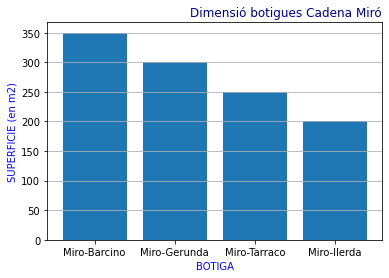

<Figure size 720x288 with 0 Axes>

In [16]:
plt.bar(establiment_m2_df.nom, establiment_m2_df.superficie)
plt.title("Dimensió botigues Cadena Miró", color = 'Darkblue', loc = 'right')
plt.xlabel('BOTIGA', color = 'b')
plt.ylabel('SUPERFICIE (en m2)', color = 'b')
plt.grid(axis = 'y')
plt.figure(figsize=(10, 4))

plt.show()


+ *And the same bar plot with seaborn to get differnt colours for each bar*

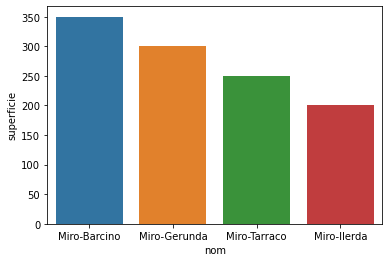

In [17]:
sns.barplot(x = 'nom',
            y = 'superficie',
            data = establiment_m2_df)
 

plt.show()